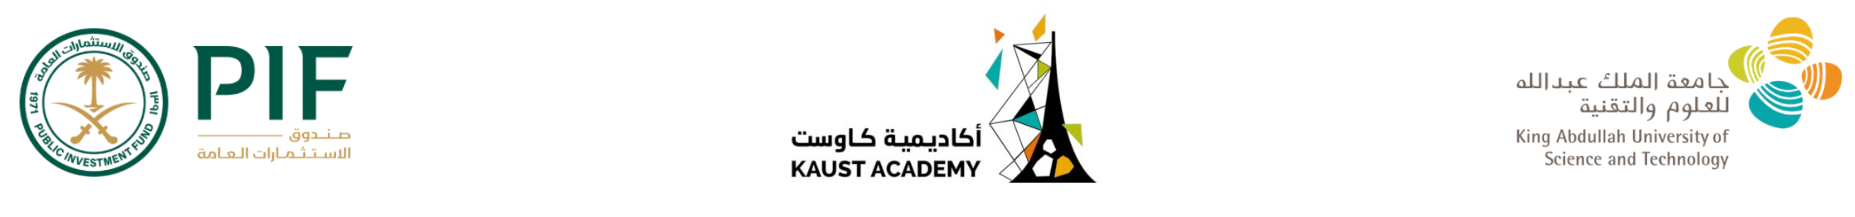

# Object Detection with YOLO (YOLOv8)
**Dataset:** Bottle Detection (1 class: `bottle`)  
**Goal:** Train a YOLO detector, evaluate it, and test it on new images.


In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00


In [3]:
! unzip bottle.zip

Archive:  bottle.zip
   creating: bottle/
  inflating: __MACOSX/._bottle       
  inflating: bottle/README.roboflow.txt  
  inflating: __MACOSX/bottle/._README.roboflow.txt  
   creating: bottle/valid/
  inflating: __MACOSX/bottle/._valid  
  inflating: bottle/README.dataset.txt  
  inflating: __MACOSX/bottle/._README.dataset.txt  
   creating: bottle/test/
  inflating: __MACOSX/bottle/._test  
  inflating: bottle/data.yaml        
  inflating: __MACOSX/bottle/._data.yaml  
   creating: bottle/train/
  inflating: __MACOSX/bottle/._train  
   creating: bottle/valid/images/
  inflating: __MACOSX/bottle/valid/._images  
   creating: bottle/valid/labels/
  inflating: __MACOSX/bottle/valid/._labels  
   creating: bottle/test/images/
  inflating: __MACOSX/bottle/test/._images  
   creating: bottle/test/labels/
  inflating: __MACOSX/bottle/test/._labels  
   creating: bottle/train/images/
  inflating: __MACOSX/bottle/train/._images  
   creating: bottle/train/labels/
  inflating: __MACOSX/bot

In [4]:
import yaml
with open("/content/bottle/data.yaml", "r") as f:
    cfg = yaml.safe_load(f)

print("Classes:", cfg["names"])
print("Train:", cfg["train"])
print("Val  :", cfg["val"])
print("Test :", cfg["test"])

Classes: ['bottle']
Train: ../train/images
Val  : ../valid/images
Test : ../test/images


## Inference

Before we train on our bottle dataset, we can run **inference** using a **pretrained YOLO model**.

- `yolov8n.pt` is pretrained on the **COCO dataset**
- **COCO has 80 object classes** (e.g., person, car, bottle, vase, etc.)
- During inference, YOLO can predict **any of these 80 classes**



In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

# 2) Inference on your dataset images folder
results = model.predict(
    source="/content/bottle/test/images",
    imgsz=416,
    conf=0.25,
    iou=0.5,
    max_det=50,
    device=0,
    save=True,
    save_txt=True,
    save_conf=True,
    project="/content/runs",
    name="bottle_infer_coco",
    verbose=False
)

print("Saved results to:", "/content/runs/bottle_infer_coco")


Results saved to /content/runs/bottle_infer_coco
18 labels saved to /content/runs/bottle_infer_coco/labels
Saved results to: /content/runs/bottle_infer_coco


### YOLOv8 Inference Parameters

- **source**: Input images, folder, video, or camera.
- **imgsz**: Input image size (larger = better accuracy, slower).
- **conf**: Confidence threshold for predictions.
- **iou**: IoU threshold for Non-Max Suppression (NMS).
- **max_det**: Maximum detections per image.
- **device**: `0` = GPU, `-1` = CPU.
- **save**: Save images with predicted boxes.
- **save_txt**: Save predictions as `.txt` files.
- **save_conf**: Include confidence score in `.txt` files.
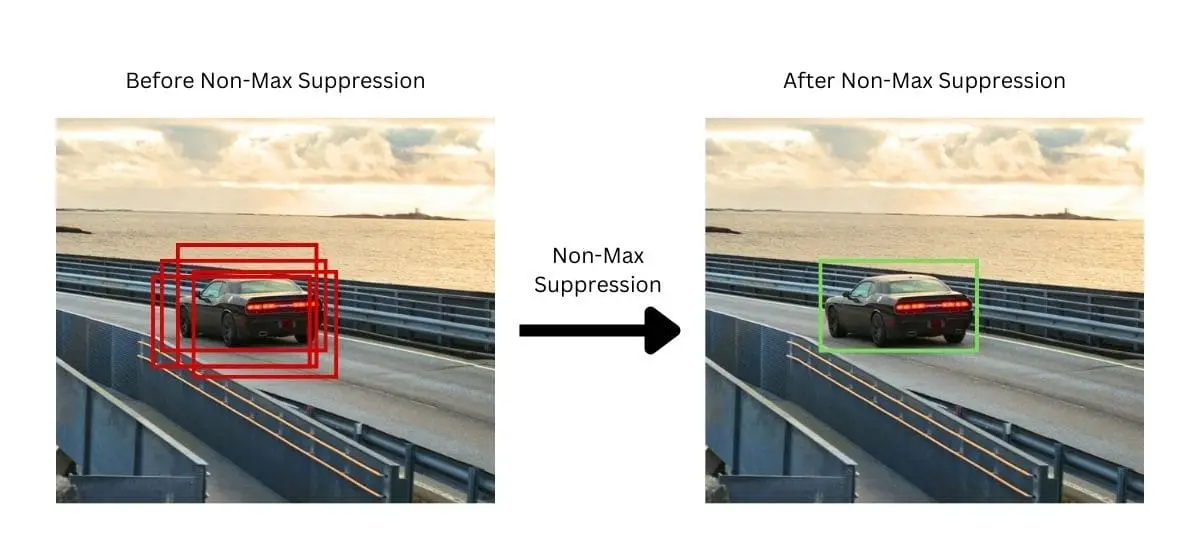


image 1/22 /content/bottle/test/images/009ak_jpg.rf.54b12e4c9f26e42288a483ee43e3c7f0.jpg: 640x640 1 vase, 9.1ms
image 2/22 /content/bottle/test/images/107_jpg.rf.0f67c515444729f6bf492f1d160abd6d.jpg: 640x640 1 bottle, 7.8ms
image 3/22 /content/bottle/test/images/120_jpg.rf.ead44e108783035e0a33002857230b20.jpg: 640x640 1 bottle, 7.8ms
image 4/22 /content/bottle/test/images/125_jpg.rf.38454243e465e21c3accd927c17eb62c.jpg: 640x640 1 snowboard, 7.8ms
image 5/22 /content/bottle/test/images/135_jpg.rf.5d2efe8955bb39dae1f908327efab5dd.jpg: 640x640 1 bottle, 7.8ms
image 6/22 /content/bottle/test/images/137_jpg.rf.75f8a3fb4b966aea3b8b6a28b894adc8.jpg: 640x640 1 vase, 7.8ms
image 7/22 /content/bottle/test/images/139_jpg.rf.906526fd324c35bacdcc09b56f42ef1d.jpg: 640x640 1 bottle, 1 vase, 7.8ms
image 8/22 /content/bottle/test/images/154_jpg.rf.6b3853ff5f3493ae570946e3539e952f.jpg: 640x640 1 bottle, 7.8ms
image 9/22 /content/bottle/test/images/5_jpg.rf.9f03df078080ca64a6fafffef064333e.jpg: 640x640 

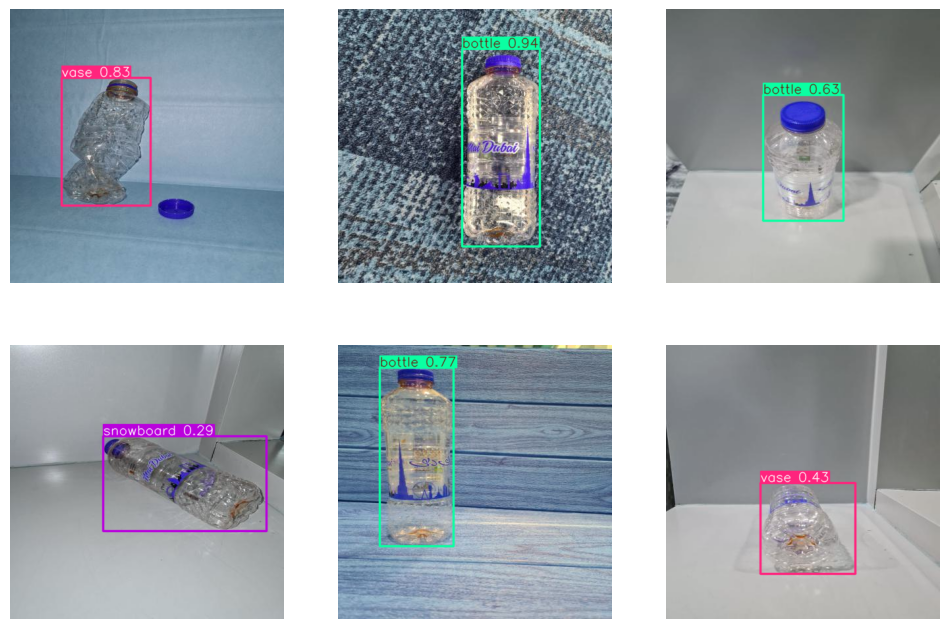

In [8]:

import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")
results = model("/content/bottle/test/images")

plt.figure(figsize=(12, 8))
for i, r in enumerate(results[:6]):
    img = r.plot()
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


## Fine-Tuning YOLOv8 on Our Dataset

Now that we have tested inference using a pretrained YOLOv8 model,  
we fine-tune the model on our own dataset to adapt it to our specific task.



In [9]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")
train_res = model.train(
    data="/content/bottle/data.yaml",
    epochs=20,
    imgsz=416,
    batch=16,
    lr0=0.001,
    optimizer="Adam",
    device=0,
    patience=5,
    save=True,
    verbose=True
)

Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/bottle/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pr

In [15]:

r = model.val(
    data="/content/bottle/data.yaml",
    split="val",
    imgsz=416,
    conf=0.50
)

# 4) Print metrics
print("Validation Results")
print("------------------")
print(f"Precision : {r.results_dict['metrics/precision(B)']:.3f}")
print(f"Recall    : {r.results_dict['metrics/recall(B)']:.3f}")
print(f"mAP@50    : {r.results_dict['metrics/mAP50(B)']:.3f}")
print(f"mAP@50-95 : {r.results_dict['metrics/mAP50-95(B)']:.3f}")

Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 617.5±128.4 MB/s, size: 28.9 KB)
val: Scanning /content/bottle/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 43/43 24.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.8it/s 1.1s
                   all         43         45          1          1      0.995       0.85
Speed: 2.7ms preprocess, 2.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/detect/val3
Validation Results
------------------
Precision : 1.000
Recall    : 1.000
mAP@50    : 0.995
mAP@50-95 : 0.850


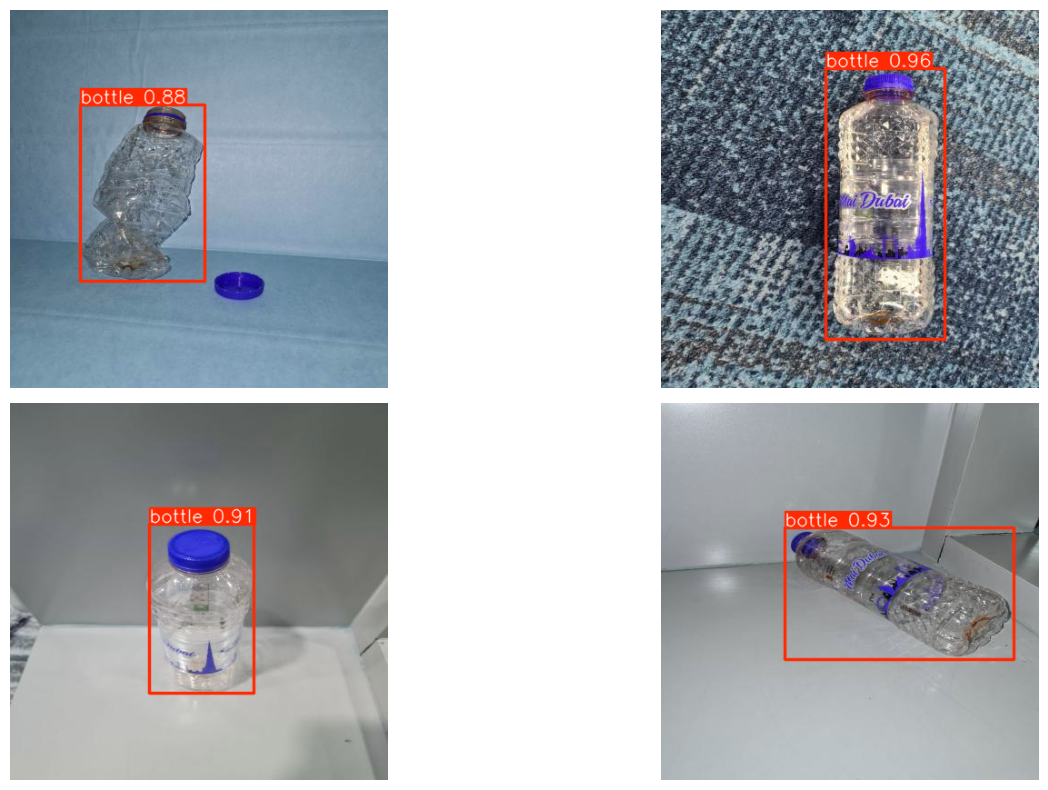

In [17]:
from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt

# load best weights from training run (adjust path if needed)
best = YOLO("/content/runs/detect/train/weights/best.pt")

test_imgs = sorted(glob.glob("/content/bottle/test/images/*"))[:4]
res = best.predict(test_imgs, imgsz=416, conf=0.50, verbose=False)

plt.figure(figsize=(16, 8))
for i, r in enumerate(res):
    plt.subplot(2, 2, i+1)
    plt.imshow(r.plot())
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='webcam.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();

          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take photo
image_path = take_photo()
print("Saved to", image_path)


<IPython.core.display.Javascript object>

Saved to webcam.jpg



image 1/1 /content/webcam.jpg: 320x416 2 bottles, 40.7ms
Speed: 2.0ms preprocess, 40.7ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 416)


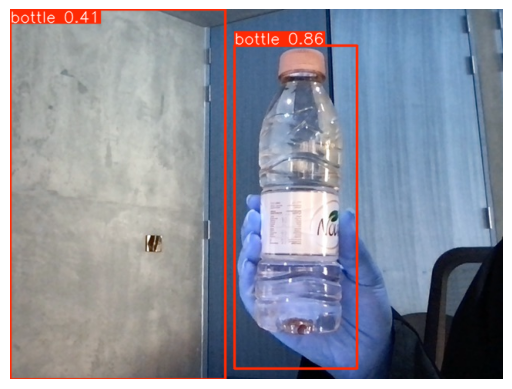

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained model (or yolov8n.pt)
model = YOLO("/content/runs/detect/train/weights/best.pt")
# or: model = YOLO("yolov8n.pt")

# Inference
result = model.predict(image_path, imgsz=416, conf=0.25)[0]

# Show result
plt.imshow(result.plot())
plt.axis("off")
plt.show()
